In [34]:
#!pip install praw

Authentication

In [35]:
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="uZDVJbrpvATDX8hsxE3fLg",
    client_secret="ARxGLgsrtwN5wd7HJepErVnvpGlj0w",
    user_agent=user_agent
)

In [36]:
import pandas as pd
import numpy as np
import re

Get Trending Topic from your Subreddit
The "bitcoin" subreddit channel will be use for this project

In [37]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("RCB").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

RCB tickets exchange and Matchday FAQ Megathread
1bf2uu1
countbismarck
1710468377.0
15
1.0
https://www.reddit.com/r/RCB/comments/1bf2uu1/rcb_tickets_exchange_and_matchday_faq_megathread/
0


In [38]:
headlines = set()
for submission in reddit.subreddit("RCB").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

720


In [39]:
#Create a dataframe from the scrapped data 
bitcoin_df = pd.DataFrame(headlines)
bitcoin_df.head()

,0
0,Match 10: RCB vs KKR Match Review
1,Launching the RCB Tickets Notification Script!
2,"For all of you that’ve been waiting for this, ..."
3,Is there a possibility of still qualifying?
4,Every team has fiery openers except RCB


In [40]:
# df = df.iloc[:, 1:]
bitcoin_df.head()

,0
0,Match 10: RCB vs KKR Match Review
1,Launching the RCB Tickets Notification Script!
2,"For all of you that’ve been waiting for this, ..."
3,Is there a possibility of still qualifying?
4,Every team has fiery openers except RCB


In [41]:
bitcoin_df.columns

RangeIndex(start=0, stop=1, step=1)

In [42]:
bitcoin_df.columns = ['Titles']

In [43]:
bitcoin_df.head()

,Titles
0,Match 10: RCB vs KKR Match Review
1,Launching the RCB Tickets Notification Script!
2,"For all of you that’ve been waiting for this, ..."
3,Is there a possibility of still qualifying?
4,Every team has fiery openers except RCB


In [44]:
bitcoin_df.Titles.duplicated().sum()

0

In [45]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
bitcoin_df["Titles"]= bitcoin_df["Titles"].apply(cleanTxt)

#Show the clean text
bitcoin_df.head()

,Titles
0,Match 10 RCB vs KKR Match Review
1,Launching the RCB Tickets Notification Script!
2,"For all of you that’ve been waiting for this, ..."
3,Is there a possibility of still qualifying?
4,Every team has fiery openers except RCB


In [46]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
bitcoin_df["Titles"]= bitcoin_df["Titles"].apply(remove_emoji)

#Show the clean text
bitcoin_df.head()

,Titles
0,Match 10 RCB vs KKR Match Review
1,Launching the RCB Tickets Notification Script!
2,"For all of you that’ve been waiting for this, ..."
3,Is there a possibility of still qualifying?
4,Every team has fiery openers except RCB


!pip install textblob

In [47]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [48]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
bitcoin_df['Subjectivity'] = bitcoin_df['Titles'].apply(getSubjectivity)
bitcoin_df['Polarity'] = bitcoin_df['Titles'].apply(getPolarity)

#Now display data
bitcoin_df.head()

,Titles,Subjectivity,Polarity
0,Match 10 RCB vs KKR Match Review,0.0,0.0
1,Launching the RCB Tickets Notification Script!,0.0,0.0
2,"For all of you that’ve been waiting for this, ...",0.0,0.0
3,Is there a possibility of still qualifying?,0.0,0.0
4,Every team has fiery openers except RCB,0.0,0.0


In [49]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
bitcoin_df["Insight"] = bitcoin_df["Polarity"].apply(getInsight)

bitcoin_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,Match 10 RCB vs KKR Match Review,0.000000,0.000000,Neutral
1,Launching the RCB Tickets Notification Script!,0.000000,0.000000,Neutral
2,"For all of you that’ve been waiting for this, ...",0.000000,0.000000,Neutral
3,Is there a possibility of still qualifying?,0.000000,0.000000,Neutral
4,Every team has fiery openers except RCB,0.000000,0.000000,Neutral
5,The Top sixes were against RCB and DK Pulled R...,0.500000,0.500000,Positive
6,Absolute Bullshit captaincy by Faf,0.900000,0.200000,Positive
7,The Battle of all Battles - Which battle are y...,0.500000,0.500000,Positive
8,My question regarding Kohli's knock (I'm not a...,0.000000,0.000000,Neutral
9,RCB vs KKR - Positives (Doing this cause I did...,0.066667,0.000000,Neutral


In [50]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

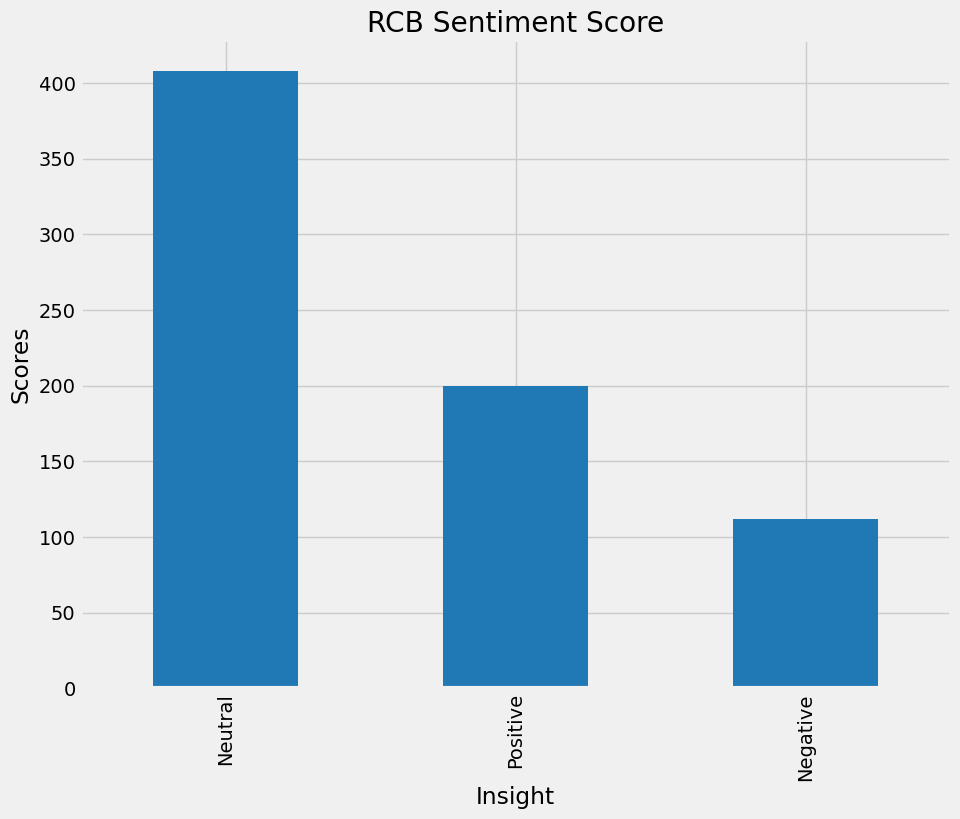

In [51]:
#Plot the values count of sentiment
plt.title("RCB Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
bitcoin_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

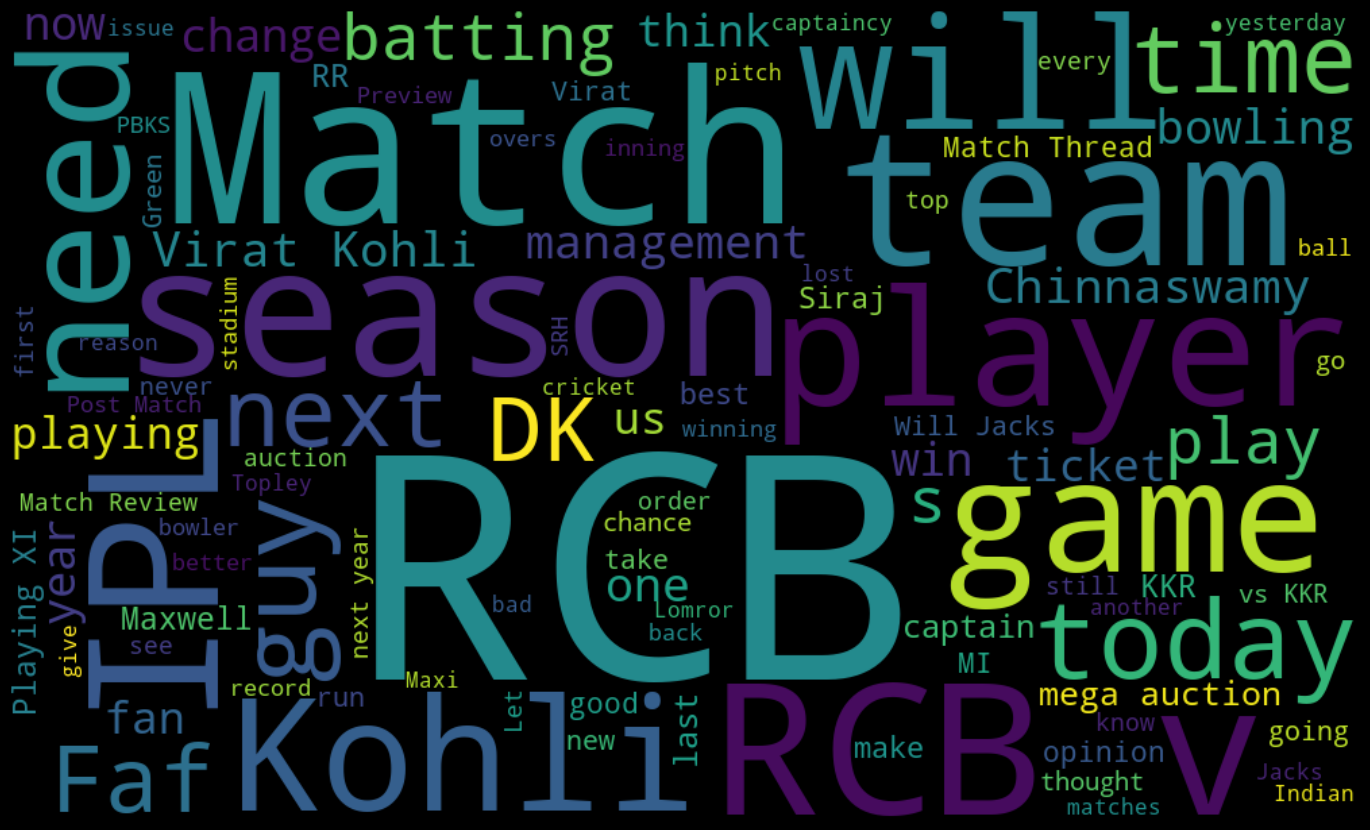

In [52]:
text = ' '.join( [twts for twts in bitcoin_df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");